# Plot Enet Predictions

Usage: 
```python
from plotseq import plot_predictions
plot_predictions(hemisphere, subtype, year, metric, sample_size=None, previous_season=False, alpha=4)
```

Parameters:
- `hemisphere`: 'north' or 'south'
- `subtype`: 'hin1' or 'h3n2'
- `year`: index corresponding to sequence in NORTH_YEARS or SOUTH_YEARS
    - North: 1 = 03-04, 2 = 04-05 ... 20 = 22-23
    - South: 1 = 03, 2 = 04 ... 20 = 22
- `metric`: 'hamming' or 'qdistance', used to construct the distance matrix
- `sample_size`: number of points to sample from the strain population to plot
- `previous_season`: if true, plot previous season rather than current season strain population
    - When used with `metric='qdistance'`, this is useful to see the distribution from which we got our predictions
- `alpha`: alpha parameter for alphashapes, default 4
        
Returns:
- `pred_df`: Dataframe of Enet predictions
- `who_df`: Dataframe of WHO prediction and WHO and Enet errors
- It will print the WHO error, Enet error, and error difference when `previous_season = False`

In [1]:
from plotseq import plot_predictions
import warnings
warnings.filterwarnings('ignore')

## Example: Enet Predictions for North H3N2 2019-20

### Plot against the 2018-19 season

Plotting the qdistance embedding, we can see how we made our predictions.

Recall:
- Multi-cluster predictions: take the E-centroid of the two largest clusters (see `emergenet_predictions.ipynb` for the formula
- Single-cluster predictions: find the sequence who's distance to the multi-cluster predictions is closest to the ratio of their clusters' respective sizes
- **Enet 1 is hidden behind WHO**

symmetric case


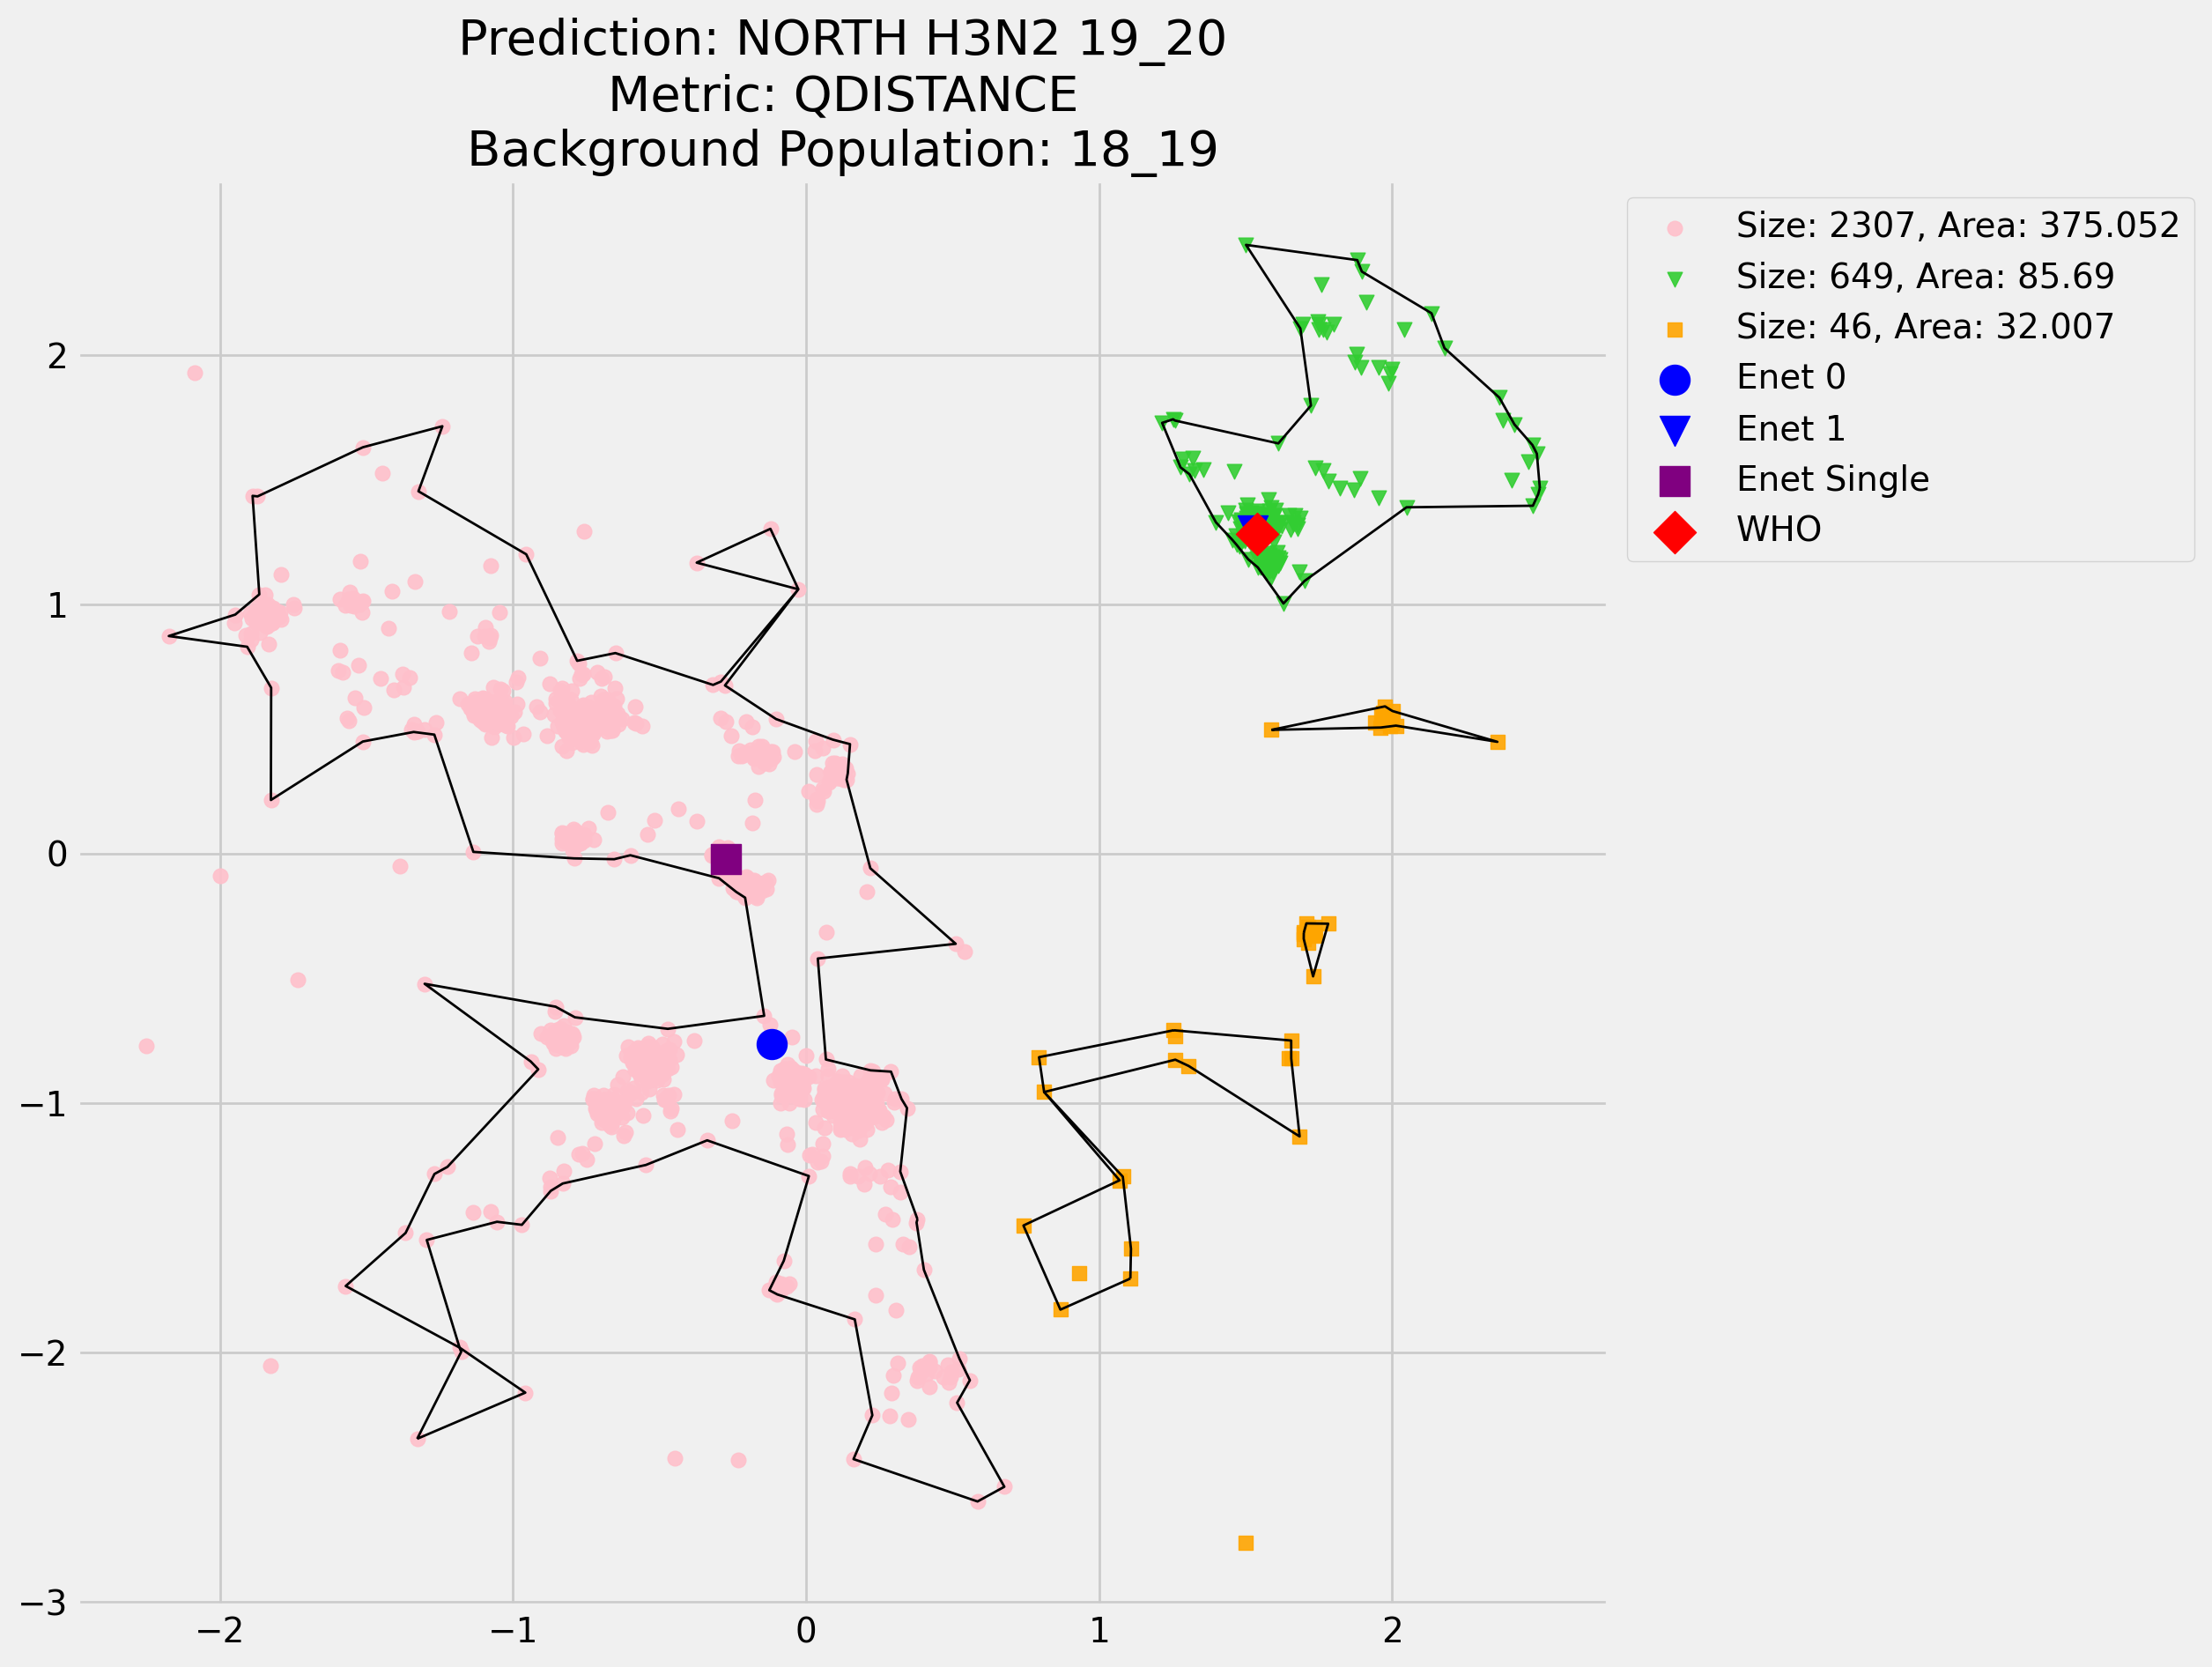

In [16]:
pred, pred_single = plot_predictions('north', 'h3n2', 17, 'qdistance', sample_size=3000, previous_season=True, alpha=4)

### Plot against the 2019-20 season

Plotting the Hamming distance embedding, we can see how well our predictions and WHO predictions do agains the actual virus population.

  0%|          | 0/3004 [00:00<?, ?it/s]

Multi-cluster
	WHO error: 13.220
	Enet error: 5.748
	Error difference: 7.472
Single-cluster
	WHO error: 13.220
	Enet error: 12.022
	Error difference: 1.198


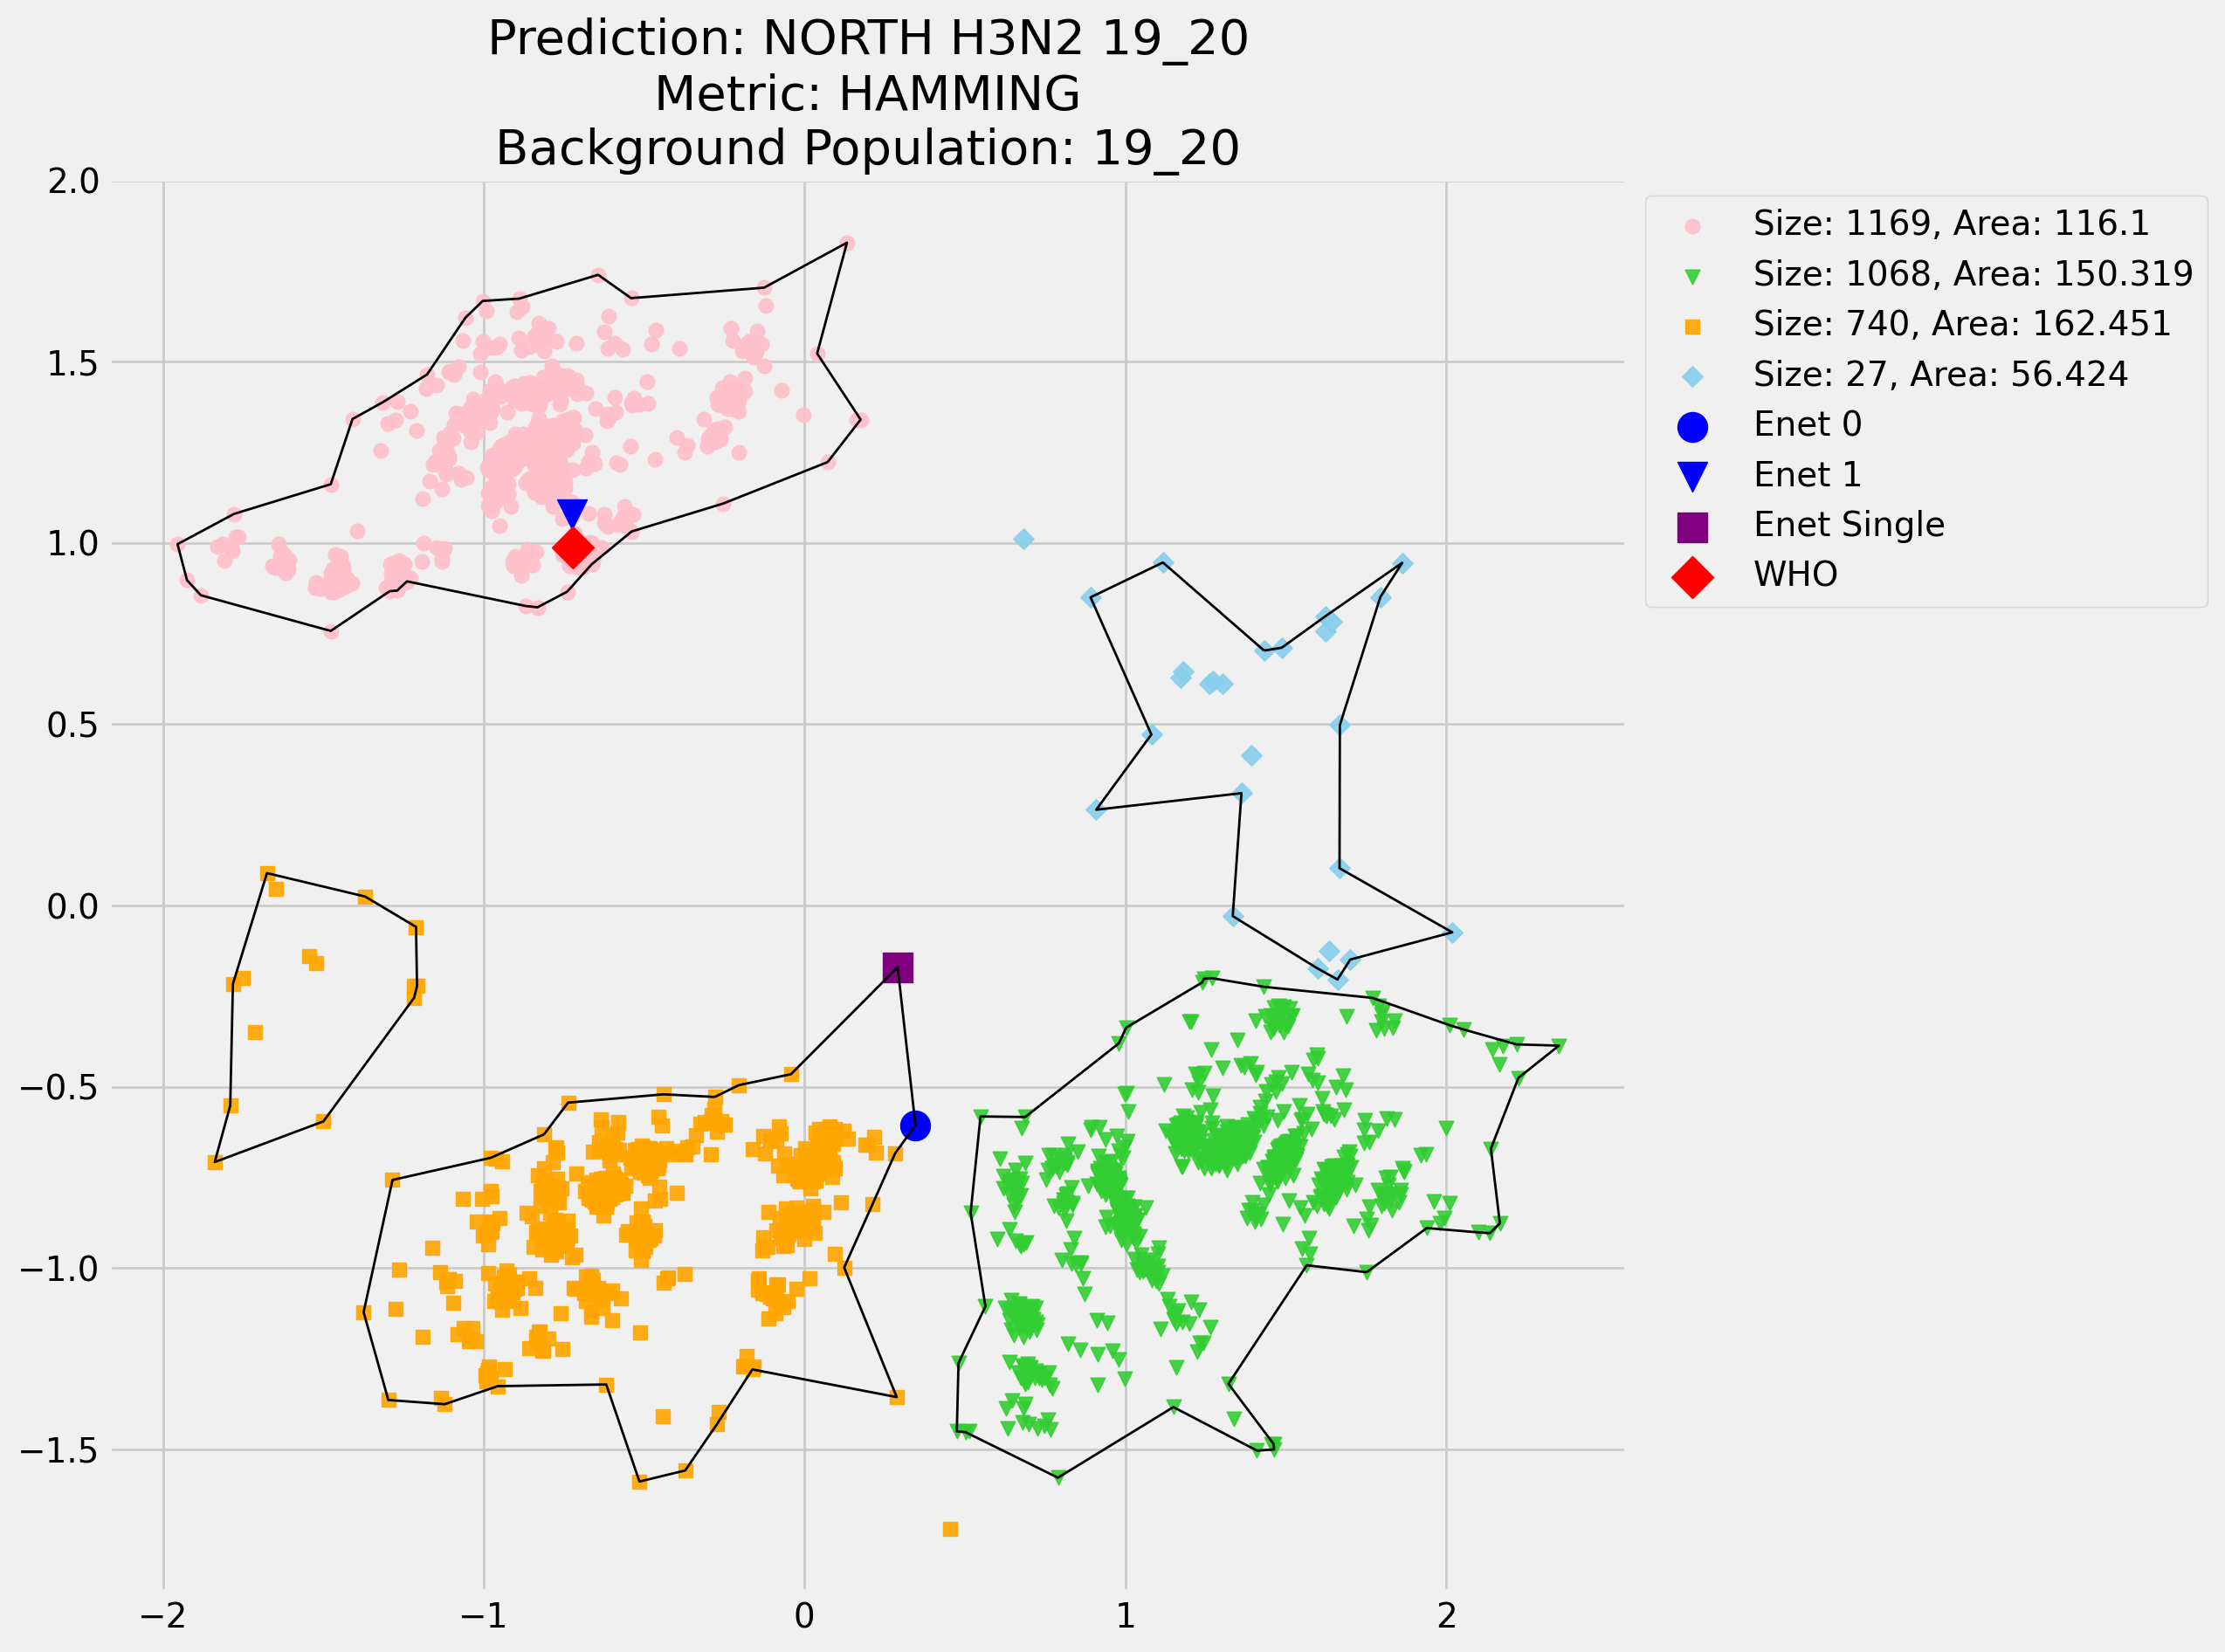

In [17]:
pred, pred_single = plot_predictions('north', 'h3n2', 17, 'hamming', sample_size=3000, previous_season=False, alpha=4)

In [18]:
pred[['season', 'name_0', 'name_1', 'name_who', 'ha_who_error', 'na_who_error', 'ha_enet_error', 'na_enet_error']]

,season,name_0,name_1,name_who,ha_who_error,na_who_error,ha_enet_error,na_enet_error
16,19_20,A/South_Africa/6114/2017,A/Texas/8534/2019,A/Kansas/14/2017,13.219626,7.679374,5.748094,2.898505


In [19]:
pred_single[['season', 'name', 'name_who', 'ha_who_error', 'na_who_error', 'ha_enet_error', 'na_enet_error']]

,season,name,name_who,ha_who_error,na_who_error,ha_enet_error,na_enet_error
16,19_20,A/Arkansas/15/2016,A/Kansas/14/2017,13.219626,7.679374,12.021784,9.100109
